# 1. The chess problem

## part (a)

In [102]:
using JuMP, Clp
m = Model(solver=ClpSolver())

sets = [:small, :large]
lathehrs = Dict(zip(sets,[3,2]))
boxwood = Dict(zip(sets,[1,4]))
profit = Dict(zip(sets,[5,8]))

@variable(m, x[sets] >= 0)
@constraint(m, Clathe, sum(lathehrs[i]*x[i] for i in sets) <= 160)
@constraint(m, Cwood, sum(boxwood[i]*x[i] for i in sets) <= 200)
@objective(m, Max, sum(profit[i]*x[i] for i in sets))

status = solve(m)
display(m)
println(getvalue(x))
println("Optimal objective is: \$", getobjectivevalue(m))

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is ClpMathProg

x: 1 dimensions:
[small] = 24.0
[large] = 44.0
Optimal objective is: $472.0


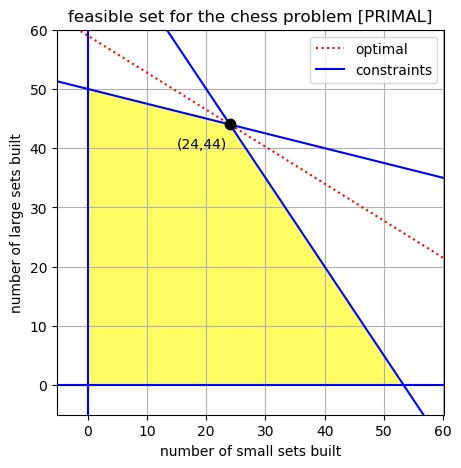

In [103]:
using PyPlot
figure(figsize=(5,5))

l = linspace(-10,100,4)
plot( l, (472-5*l)/8, "r:")
plot( l, 0*l, "b-" )                
plot( 0*l, l, "b-" ) 
plot( l, (160 - 3*l)/2, "b-") 
plot( l, (200 - l)/4, "b-")

text( 15, 40, "(24,44)")
plot( 24, 44, "k.", markersize=15)
fill( [0, 0, 24, 53, 0], [0, 50, 44, 0, 0], color=(255/255,255/255,100/255) )

grid(); axis("equal"); axis([-5,60,-5,60]); 
xlabel("number of small sets built");  ylabel("number of large sets built")
title("feasible set for the chess problem [PRIMAL]")
legend(["optimal", "constraints"]);

## part (b)

In [139]:
using JuMP, Clp

m = Model(solver=ClpSolver())
@variable(m, λ[1:2] >= 0)
@constraint(m, λ[1] + 3λ[2] >= 5)
@constraint(m, 4λ[1] + 2λ[2] >= 8)
@objective(m, Min, 200λ[1] + 160λ[2])

status = solve(m)

display(m)

println(status)
println("dual variables are: ", getvalue(λ))
println("Optimal objective is: \$", getobjectivevalue(m))

Minimization problem with:
 * 2 linear constraints
 * 2 variables
Solver is ClpMathProg

Optimal
dual variables are: [1.4, 1.2]
Optimal objective is: $471.99999999999994


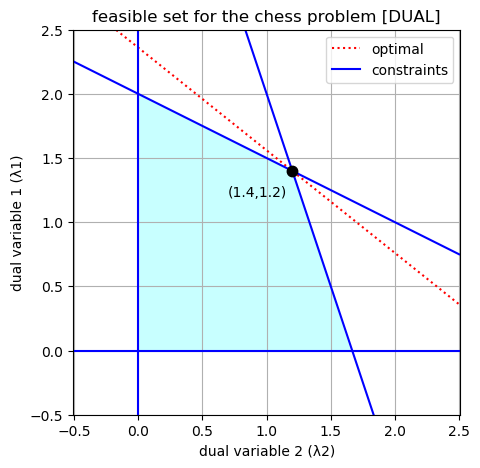

In [140]:
using PyPlot
figure(figsize=(5,5))

l = linspace(-0.5,2.5,4)
plot( l, (472-160*l)/200, "r:")
plot( l, 0*l, "b-" )                
plot( 0*l, l, "b-" ) 
plot( l, (5 - 3*l), "b-") 
plot( l, (8 - 2*l)/4, "b-")

text( .7, 1.2, "(1.4,1.2)")
plot( 1.2, 1.4, "k.", markersize=15)
fill( [0, 0, 1.2, 1.65, 0], [0, 2.0, 1.4, 0, 0], color=(200/255,255/255,255/255) )

grid(); axis("equal"); axis([-0.5,2.5,-0.5,2.5]); 
xlabel("dual variable 2 (λ2)");  ylabel("dual variable 1 (λ1)")
title("feasible set for the chess problem [DUAL]")
legend(["optimal", "constraints"]);

The optimal value remains the same for both the primal and dual.

# 2. Stigler’s supplement

In [1]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

## part (a)

In [37]:
using JuMP, Clp
b = Model(solver = ClpSolver())

@variable(b, amnt[foods] >= 0)

@constraint(b, constr[i in nutrients], sum(amnt[s] * data[s,i] for s in foods) >= lower[i])

@objective(b, Min, sum( amnt[s] for s in foods))

solve(b)
println("The most you would pay for a calcium pill (500mg) is : \$", 0.5*getdual(constr["Calcium (g)"]))

The most you would pay for a calcium pill (500mg) is : $0.015868856722818517


## part (b)

In [61]:
sum = 0
nocalc = [1:2;4:9]

for i in nutrients[nocalc]
    sum = sum+(lower[i]*getdual(constr[i]))
end
sum = sum+(lower["Calcium (g)"]*0.01)

println("The new optimal diet (with calcium pills) costs: \$", 365*sum, " annually")
println("The optimal diet WITHOUT calcium pills costs: \$", 365*getobjectivevalue(b), " annually")
println("Using calcium pills, you save: \$", 365*(getobjectivevalue(b) - sum))

The new optimal diet (with calcium pills) costs: $33.314319219340234 annually
The optimal diet WITHOUT calcium pills costs: $39.66173154546625 annually
Using calcium pills, you save: $6.3474123261260145


# 3. Dual interpretation

## part (a)

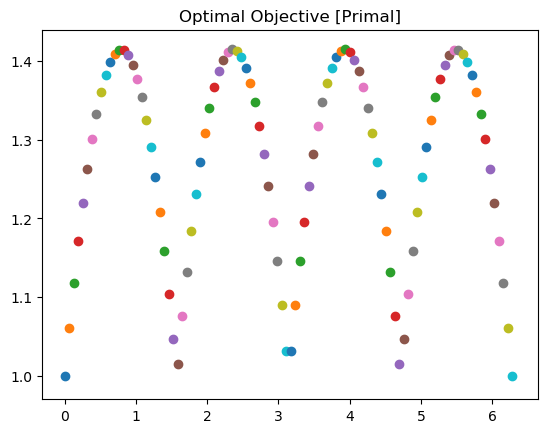

In [71]:
using PyPlot

trange = linspace(0, pi*2, 100)
for t = trange
    m = Model(solver = ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))
    @objective(m, Min, p + q + r + s)
    solve(m)
    title("Optimal Objective [Primal]")
    scatter(t, getobjectivevalue(m))
end

## part (b)

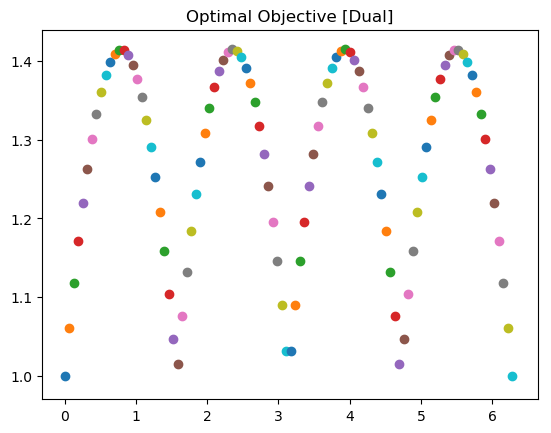

In [72]:
using PyPlot

trange = linspace(0, pi*2, 100)
for t = trange
    m = Model(solver = ClpSolver())
    @variable(m, λ[1:4] >= 0)
    @constraint(m, λ[1] - λ[3] <= 1)
    @constraint(m, λ[2] - λ[4] <= 1)
    @constraint(m, λ[3] - λ[1] <= 1)
    @constraint(m, λ[4] - λ[2] <= 1)
    @objective(m, Max, λ[1]*cos(t) + λ[2]*sin(t) - λ[3]*cos(t) - λ[4]*sin(t))
    solve(m)
    title("Optimal Objective [Dual]")
    scatter(t, getobjectivevalue(m))
end

The solutions are the same.